In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("E:/datasets/diabetes.csv")

In [25]:
X_Data = df[df.columns[:-1]]
Y_Data = df[["Outcome"]]

In [12]:
X_Data = X_Data.apply(lambda x: x / x.max(axis=0))

In [26]:
df = pd.concat([X_Data, Y_Data], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1


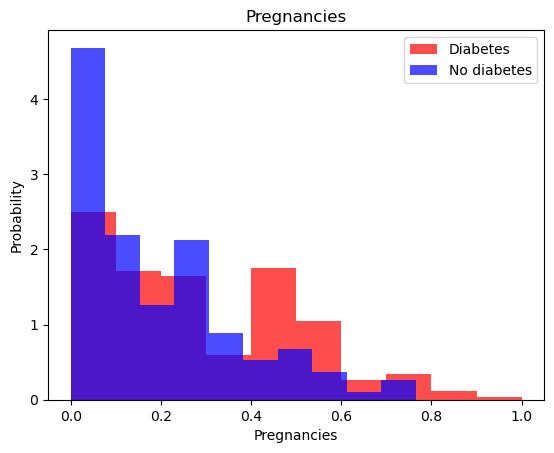

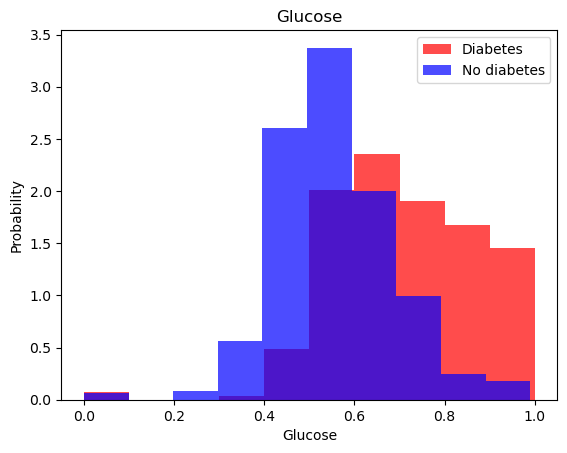

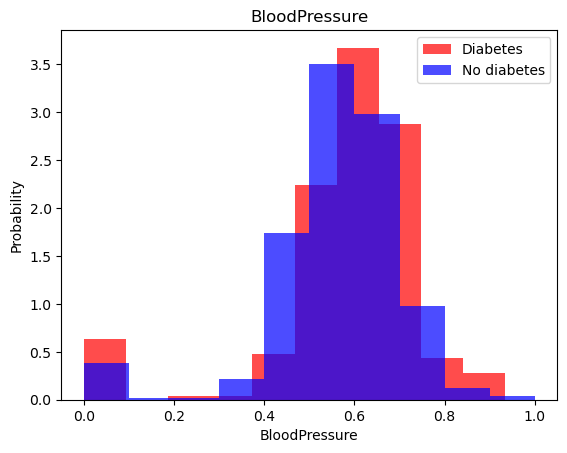

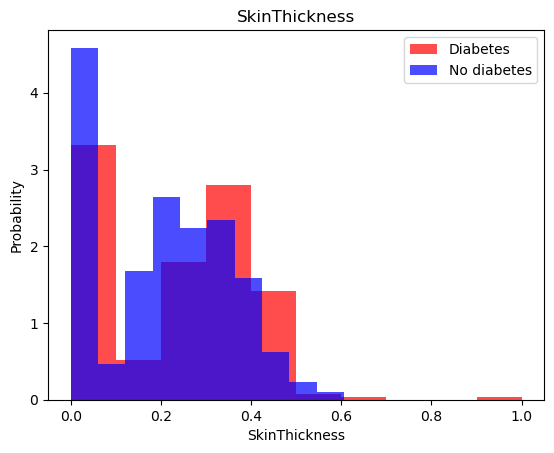

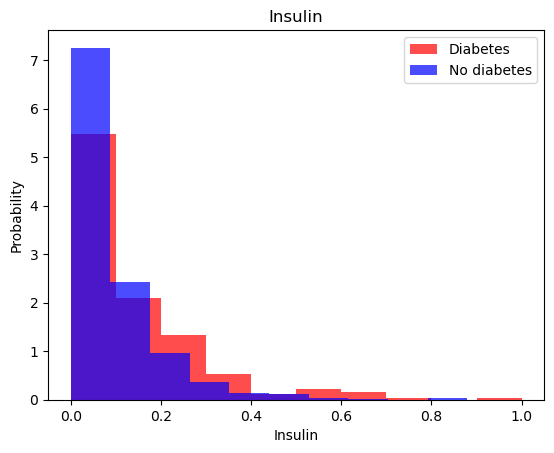

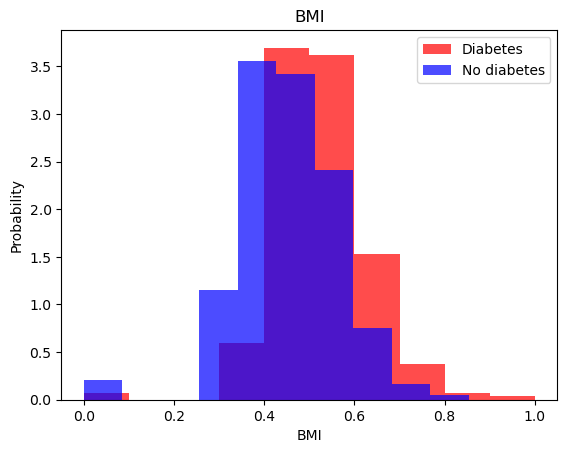

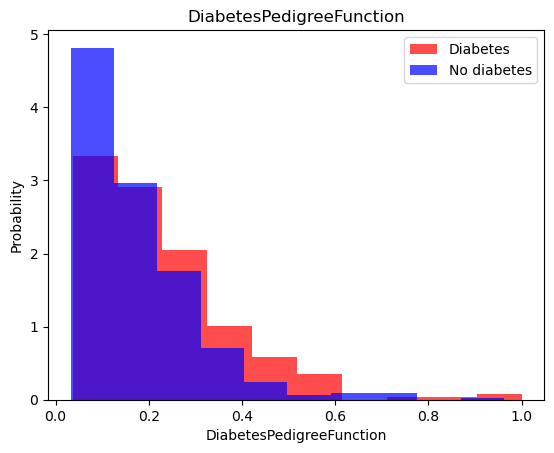

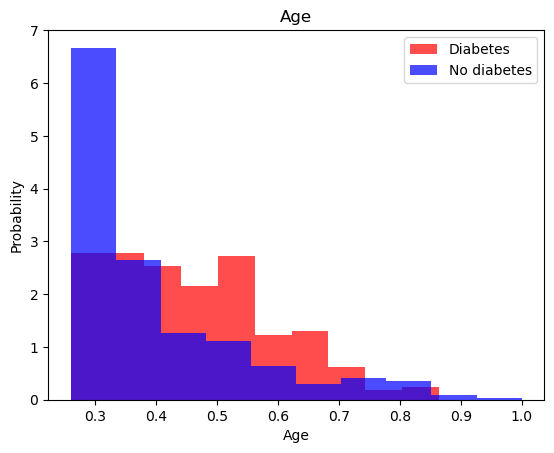

In [21]:
#using density because of different numbers in each of target's option

for label in df.columns[:-1]:
    plt.hist(df[df.Outcome == 1][label], color="red", alpha=0.7, label="Diabetes", density=True)
    plt.hist(df[df.Outcome == 0][label], color="blue", alpha=0.7, label="No diabetes",  density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [37]:
X_Data = df[df.columns[:-1]].values
Y_Data = df[df.columns[-1]].values

In [50]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X_Data, Y_Data, test_size=0.2)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

In [52]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [53]:
model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 1ms/sample - loss: 3.0764e-08 - acc: 0.7419


[3.076368670917873e-08, 0.7419355]